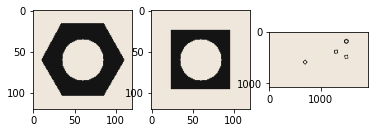

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

hexnut_template threshold value : 116.0
squarenut_template threshold value : 116.0
conveyor_f100 threshold value : 128.0


Text(0.5, 1.0, 'conveyor_f100')

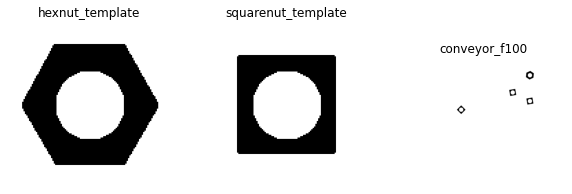

In [24]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('hexnut_template.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img1 = cv.imread('squarenut_template.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.imread('conveyor_f100.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Otsu's thresholding after Gaussian filtering
blur1 = cv.GaussianBlur(img,(5,5),0)
ret1,th1 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur2 = cv.GaussianBlur(img1,(5,5),0)
ret2,th2 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur3 = cv.GaussianBlur(img2,(5,5),0)
ret3,th3 = cv.threshold(blur3,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print('hexnut_template threshold value :', ret1)
print('squarenut_template threshold value :', ret2)
print('conveyor_f100 threshold value :', ret3)

# plot all the images
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(th1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(th2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(th3, cmap='gray')
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

Text(0.5, 1.0, 'conveyor_f100')

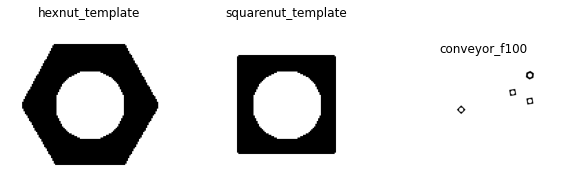

In [25]:
kernel = np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

# plot all the images
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(closing1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(closing2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(closing3, cmap='gray')
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

Number of components in hexnut_template : 3
Statistics in hexnut_template : [[  11   16   99   88 4726]
 [   0    0  120  120 7717]
 [  36   36   49   49 1957]]
Centriods in hexnut_template : [[59.83368599 59.22323318]
 [59.168848   59.54269794]
 [60.         60.        ]]
Number of components in squarenut_template : 3
Statistics in squarenut_template : [[  24   24   72   72 3223]
 [   0    0  120  120 9220]
 [  36   36   49   49 1957]]
Centriods in squarenut_template : [[59.19640087 59.19640087]
 [59.5        59.5       ]
 [60.         60.        ]]
Number of components in conveyor_f100 : 6
Statistics in conveyor_f100 : [[    651     151     895     499   13922]
 [      0       0    1920    1080 2051850]
 [   1476     176      49      49    1957]
 [   1276     376      49      49    1957]
 [   1476     476      49      49    1957]
 [    676     576      49      49    1957]]
Centriods in conveyor_f100 : [[1274.77776182  400.05430254]
 [ 956.25252528  540.88298072]
 [1500.          200.

Text(0.5, 1.0, 'conveyor_f100')

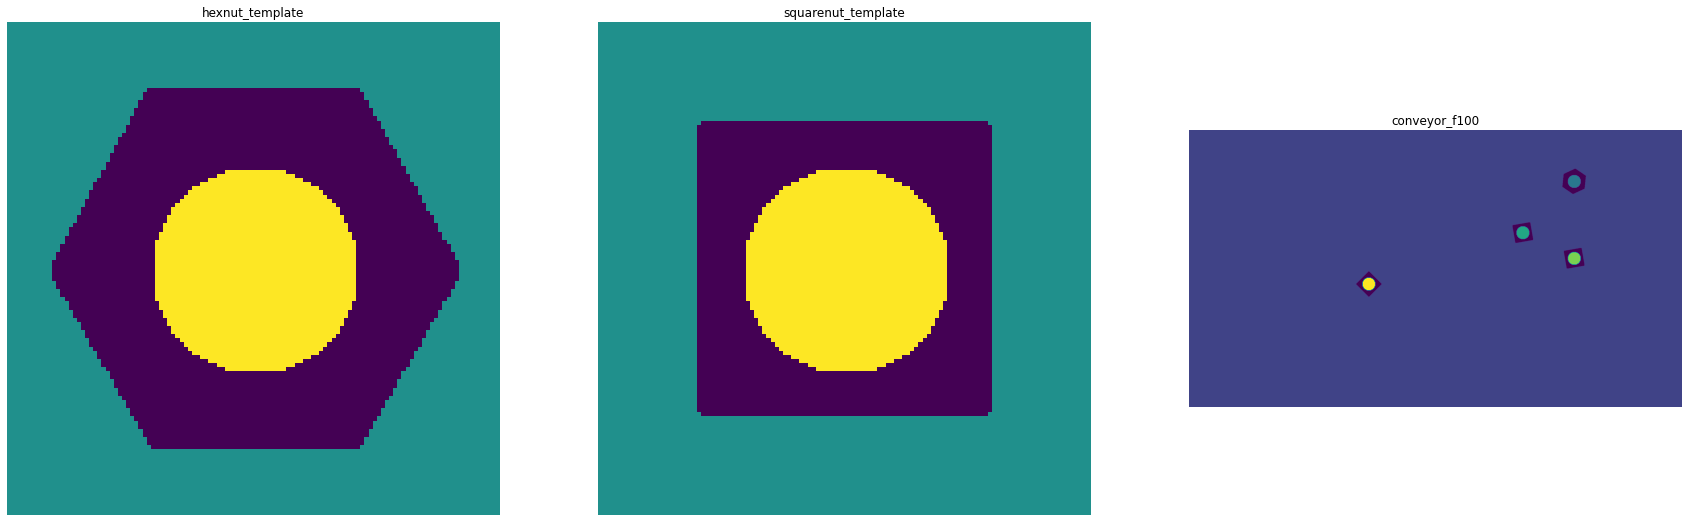

In [26]:
nb_components1, output1, stats1, centroids1 = cv.connectedComponentsWithStats(closing1)
nb_components2, output2, stats2, centroids2 = cv.connectedComponentsWithStats(closing2)
nb_components3, output3, stats3, centroids3 = cv.connectedComponentsWithStats(closing3)

print("Number of components in hexnut_template :", nb_components1)
print("Statistics in hexnut_template :", stats1)
print("Centriods in hexnut_template :", centroids1)

print("Number of components in squarenut_template :", nb_components2)
print("Statistics in squarenut_template :", stats2)
print("Centriods in squarenut_template :", centroids2)

print("Number of components in conveyor_f100 :", nb_components3)
print("Statistics in conveyor_f100 :", stats3)
print("Centriods in conveyor_f100 :", centroids3)

fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(output1)
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(output2)
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(output3)
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

Text(0.5, 1.0, 'conveyor_f100')

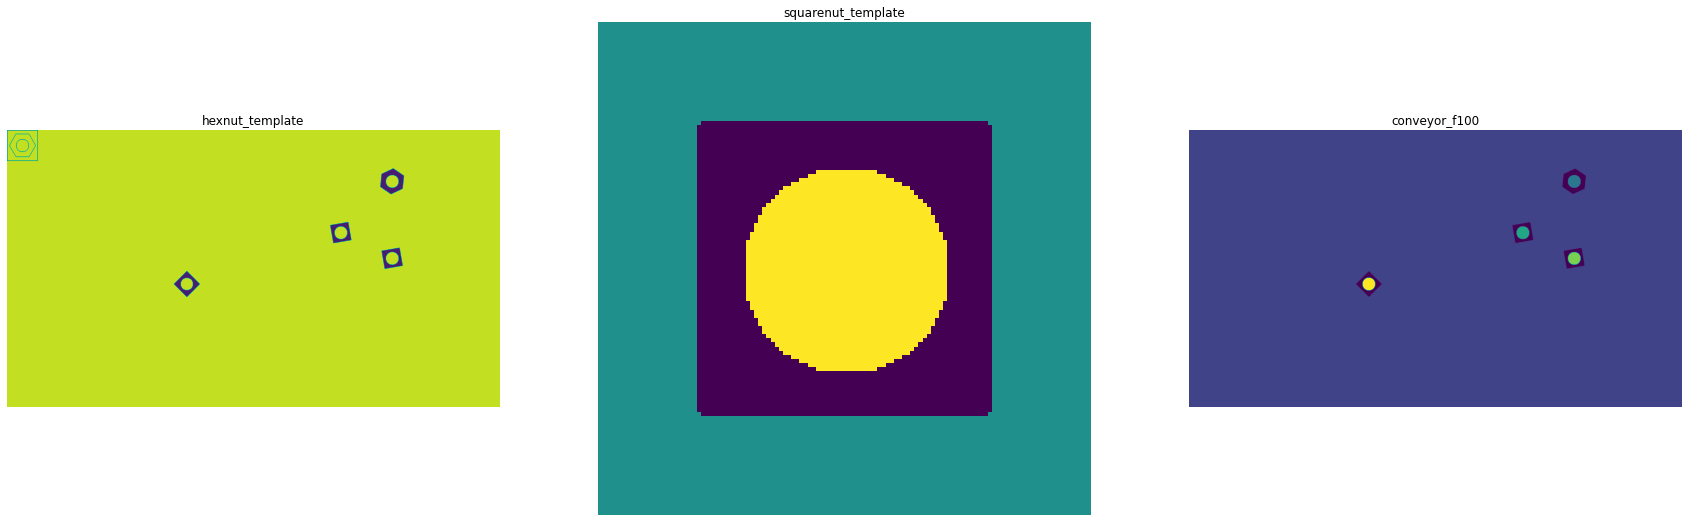

In [35]:
contours, hierarchy = cv.findContours(closing1, 2, 1)
img = np.zeros(img2.shape, dtype=np.uint8)
cv.drawContours(img2, contours, -1,(0,0,0), thickness=1)

fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(img2)
ax[0].axis('off')
ax[0].set_title('hexnut_template')
ax[1].imshow(output2)
ax[1].axis('off')
ax[1].set_title('squarenut_template')
ax[2].imshow(output3)
ax[2].axis('off')
ax[2].set_title('conveyor_f100')

In [63]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img1 = cv.imread('hexnut_template.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.imread('conveyor_f100.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Otsu's thresholding after Gaussian filtering
blur1 = cv.GaussianBlur(img1,(5,5),0)
ret1,th1 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur2 = cv.GaussianBlur(img2,(5,5),0)
ret2,th2 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

contours,hierarchy = cv.findContours(th1,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(th2,2,1)
temp = 10 
for cnt2_ind in range(len(contours)):
    cnt2 = contours[cnt2_ind]
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    if min(temp, ret) == ret:
        temp = min(temp, ret)
        ind = cnt2_ind
print(temp, ind)


3.7903014060702844e-13 0


In [ ]:
img1 = cv.imread('star.jpg',0)
img2 = cv.imread('star2.jpg',0)
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )